## Examining Cloudiness Across the Gulf Stream

Initially a figure for prelims

In [1]:
import numpy as np
import xarray as xr
import rioxarray
import os.path as op
import xrft
from matplotlib import colors, ticker
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#hycom = xr.open_rasterio('hycom_gs_img.tif')
#modis = xr.open_rasterio('stacked_sst-0000000000-0000000000.tif')
modis_sst = xr.open_rasterio('stacked_sst_171819.tif')
modis_chl = xr.open_rasterio('stacked_chl_171819.tif')

In [ ]:
modis_sst = modis_sst.sel(band=slice(1,1050))
modis_chl = modis_chl.sel(band=slice(1,1050))

modis_sst_subset = modis_sst.sel(x=slice(-75,-66))
modis_chl_subset = modis_chl.sel(x=slice(-75,-66))

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


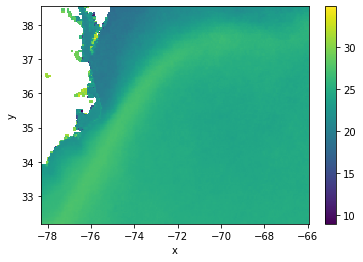

In [ ]:
modis_sst.mean(dim='band').plot()

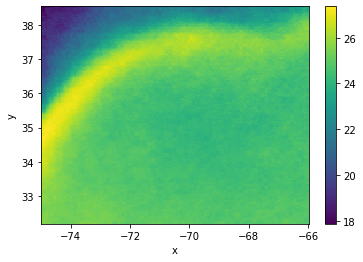

In [ ]:
modis_sst_subset = modis_sst.sel(x=slice(-75,-66), band=slice(1,1000))
modis_sst_subset.mean(dim='band').plot()

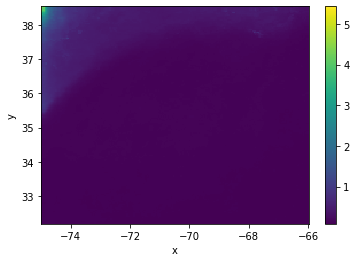

In [ ]:
modis_chl_subset = modis_chl.sel(x=slice(-75,-66), band=slice(1,1000))
modis_chl_subset.mean(dim='band').plot()

In [ ]:
modis_sst_subset.shape

(1000, 177, 251)

In [ ]:
X = np.array(modis_sst_subset).reshape(1000,177*251)
X = np.nanmean(X.reshape(-1, 200, 177*251), axis=1)
np.count_nonzero(np.isnan(X))

0

In [ ]:
Xc = np.array(modis_chl_subset).reshape(1000,177*251)
Xc = np.nanmean(Xc.reshape(-1, 200, 177*251), axis=1)
np.count_nonzero(np.isnan(Xc))

0

In [ ]:
Xc.shape, X.shape

((5, 44427), (5, 44427))

In [ ]:
Xsc = np.concatenate((Xc, X), axis=0)

In [ ]:
count_modis_sst = np.count_nonzero(~np.isnan(modis_sst_subset), axis=0)
count_modis_sst_full = np.count_nonzero(~np.isnan(modis_sst), axis=0)
time_count_modis_sst = np.count_nonzero(~np.isnan(modis_sst_subset), axis=(1,2))

count_modis_chl = np.count_nonzero(~np.isnan(modis_chl_subset), axis=0)
count_modis_chl_full = np.count_nonzero(~np.isnan(modis_chl), axis=0)
time_count_modis_chl = np.count_nonzero(~np.isnan(modis_chl_subset), axis=(1,2))

(array([  41.,  108.,  196.,  265.,  479.,  912.,  901., 1020., 1402.,
        1235., 1208., 1401., 1280., 1300., 1625., 1361., 1384., 1792.,
        1580., 1697., 1831., 1500., 1788., 1543., 1488., 1807., 1586.,
        1499., 2068., 1686., 1521., 1459.,  988.,  788.,  751.,  449.,
         311.,  138.,   34.,    5.]),
 array([135.  , 141.35, 147.7 , 154.05, 160.4 , 166.75, 173.1 , 179.45,
        185.8 , 192.15, 198.5 , 204.85, 211.2 , 217.55, 223.9 , 230.25,
        236.6 , 242.95, 249.3 , 255.65, 262.  , 268.35, 274.7 , 281.05,
        287.4 , 293.75, 300.1 , 306.45, 312.8 , 319.15, 325.5 , 331.85,
        338.2 , 344.55, 350.9 , 357.25, 363.6 , 369.95, 376.3 , 382.65,
        389.  ]),
 <a list of 40 Patch objects>)

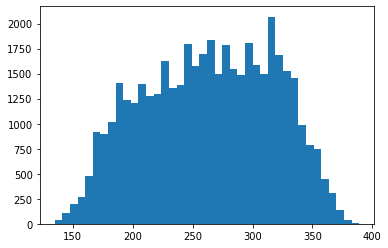

In [ ]:
plt.hist(count_modis_sst.flatten(), bins=40)

(array([  16.,  106.,  676., 1395., 1838., 2164., 1865., 1936., 2402.,
        2422., 3358., 3395., 4018., 4883., 3942., 2872., 1678.,  608.,
         393.,  262.,  210.,  244.,  211.,  197.,  246.,  265.,  228.,
         190.,  216.,  230.,  211.,  280.,  268.,  255.,  311.,  220.,
         166.,  147.,   86.,   17.]),
 array([ 52.   ,  59.375,  66.75 ,  74.125,  81.5  ,  88.875,  96.25 ,
        103.625, 111.   , 118.375, 125.75 , 133.125, 140.5  , 147.875,
        155.25 , 162.625, 170.   , 177.375, 184.75 , 192.125, 199.5  ,
        206.875, 214.25 , 221.625, 229.   , 236.375, 243.75 , 251.125,
        258.5  , 265.875, 273.25 , 280.625, 288.   , 295.375, 302.75 ,
        310.125, 317.5  , 324.875, 332.25 , 339.625, 347.   ]),
 <a list of 40 Patch objects>)

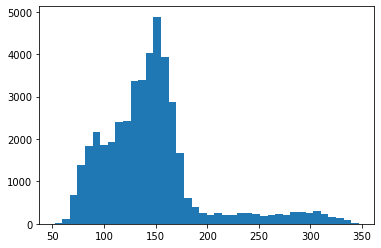

In [ ]:
plt.hist(count_modis_chl.flatten(), bins=40)

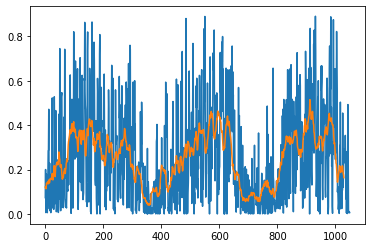

In [ ]:
total_sst_pix = modis_sst_subset.shape[1] * modis_sst_subset.shape[2]
plt.plot(time_count_modis_sst/total_sst_pix)
N=21
running_avg_sst = np.convolve(time_count_modis_sst/total_sst_pix, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_sst)

In [ ]:
running_avg_sst.shape, time_count_modis_sst.shape

((1030,), (1050,))

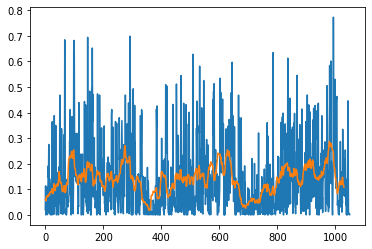

In [ ]:
total_chl_pix = modis_chl_subset.shape[1] * modis_chl_subset.shape[2]
plt.plot(time_count_modis_chl/total_chl_pix)
N=21
running_avg_chl = np.convolve(time_count_modis_chl/total_chl_pix, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_chl)

In [ ]:
running_avg_chl.shape

(1030,)

In [ ]:
modis_sst[0,:,:] = count_modis_sst_full
modis_chl[0,:,:] = count_modis_chl_full

In [ ]:
import matplotlib.dates as mdates
import datetime as dt

N = 1050
now = dt.datetime.strptime('Jan 1 2017', '%b %d %Y')
then = now + dt.timedelta(days=N)
days = mdates.drange(now,then,dt.timedelta(days=1))

N = 1030
now = dt.datetime.strptime('Jan 1 2017', '%b %d %Y')
then = now + dt.timedelta(days=N)
days_avg = mdates.drange(now,then,dt.timedelta(days=1))

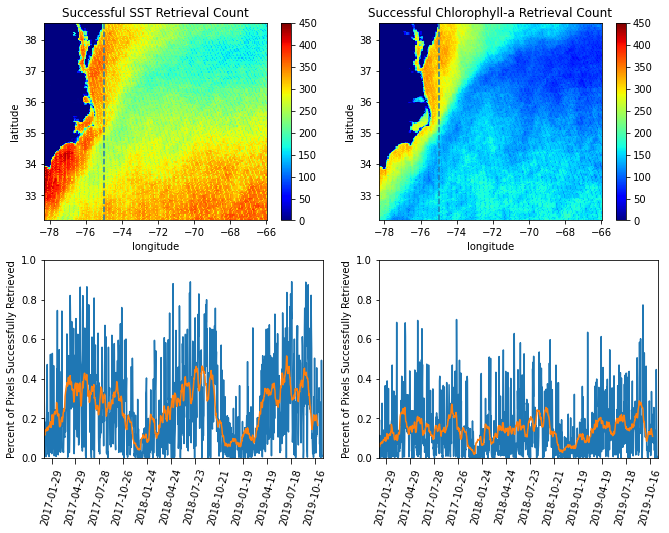

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11,8))

#modis_sst[0].plot(ax=ax[0], cmap='cividis', vmin=0, vmax=250)
modis_sst[0].plot(ax=ax[0,0], cmap='jet', vmin=0, vmax=450)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].set_title('Successful SST Retrieval Count')
ax[0,0].axvline(x=-75, linestyle='--')

ax[1,0].set_ylim(0,1)
ax[1,0].set_ylabel('Percent of Pixels Successfully Retrieved')
ax[1,0].plot(days, time_count_modis_sst/total_sst_pix)
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1,0].xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax[1,0].plot(days_avg,running_avg_sst)
ax[1,0].tick_params('x', labelrotation=75, length=6)
ax[1,0].set_xlim(days[0], days[-1])

modis_chl[0].plot(ax=ax[0,1], cmap='jet', vmin=0, vmax=450)
ax[0,1].set_xlabel('longitude')
ax[0,1].set_ylabel('latitude')
ax[0,1].set_title('Successful Chlorophyll-a Retrieval Count')
ax[0,1].axvline(x=-75, linestyle='--')

ax[1,1].set_ylim(0,1)
ax[1,1].set_ylabel('Percent of Pixels Successfully Retrieved')
ax[1,1].plot(days, time_count_modis_chl/total_chl_pix)
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1,1].xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax[1,1].plot(days_avg,running_avg_chl)
ax[1,1].tick_params('x', labelrotation=75, length=6)
ax[1,1].set_xlim(days[0], days[-1])

plt.savefig('modis_cloudiness', dpi=600, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight')

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(8.0, 35.0)

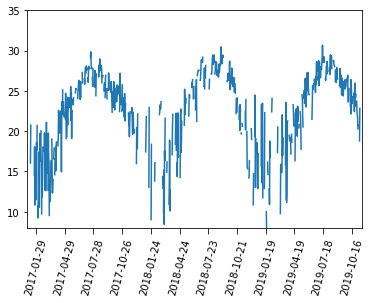

In [ ]:
modis_sst_subset = modis_sst.sel(x=slice(-76.5,-74), y=slice(36.8, 34.5), band=slice(1,1050))
sst_avg = np.mean(modis_sst_subset, axis=(1,2))
sst_avg[np.count_nonzero(~np.isnan(modis_sst_subset),axis=(1,2)) < 250] = np.nan

fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax.tick_params('x', labelrotation=75, length=6)
ax.set_xlim(days[0], days[-1])

ax.plot(days, sst_avg)
ax.set_ylim(8,35)

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


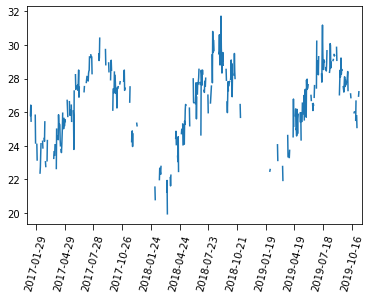

In [ ]:
modis_sst_subset = modis_sst.sel(x=slice(-75,-74.5), y=slice(34.5, 34), band=slice(1,1050))
sst_avg = np.mean(modis_sst_subset, axis=(1,2))
sst_avg[np.count_nonzero(~np.isnan(modis_sst_subset),axis=(1,2)) < 10] = np.nan

fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax.tick_params('x', labelrotation=75, length=6)
ax.set_xlim(days[0], days[-1])

ax.plot(days, sst_avg)
#ax.set_ylim(10,30)

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(0.0, 1.0)

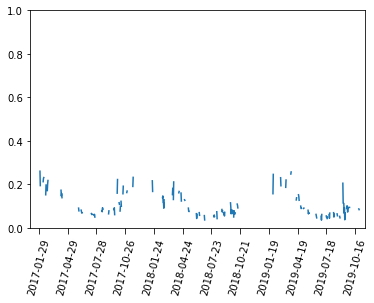

In [ ]:
modis_chl_subset = modis_chl.sel(x=slice(-75,-74.5), y=slice(34.5, 34), band=slice(1,1050))
chl_avg = np.mean(modis_chl_subset, axis=(1,2))
chl_avg[np.count_nonzero(~np.isnan(modis_chl_subset),axis=(1,2)) < 5] = np.nan

fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax.tick_params('x', labelrotation=75, length=6)
ax.set_xlim(days[0], days[-1])

ax.plot(days, chl_avg)
ax.set_ylim(0,1)

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(0.0, 5.0)

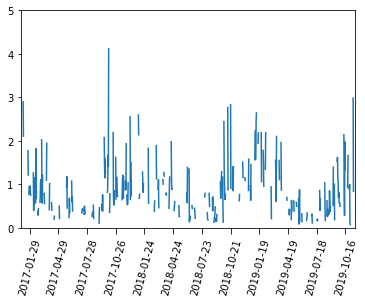

In [ ]:
modis_chl_subset = modis_chl.sel(x=slice(-75.5,-75), y=slice(35.3, 34.8), band=slice(1,1050))
chl_avg = np.mean(modis_chl_subset, axis=(1,2))
chl_avg[np.count_nonzero(~np.isnan(modis_chl_subset),axis=(1,2)) < 10] = np.nan

fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax.tick_params('x', labelrotation=75, length=6)
ax.set_xlim(days[0], days[-1])

ax.plot(days, chl_avg)
ax.set_ylim(0,5)

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(0.0, 8.0)

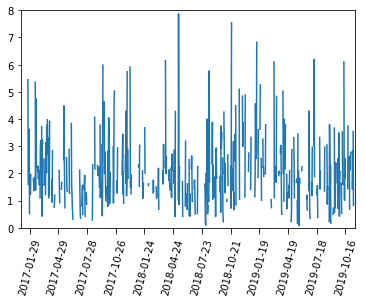

In [ ]:
modis_chl_subset = modis_chl.sel(x=slice(-76.5,-74), y=slice(36.8, 34.5), band=slice(1,1050))
chl_avg = np.mean(modis_chl_subset, axis=(1,2))
chl_avg[np.count_nonzero(~np.isnan(modis_chl_subset),axis=(1,2)) < 250] = np.nan

fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax.tick_params('x', labelrotation=75, length=6)
ax.set_xlim(days[0], days[-1])

ax.plot(days, chl_avg)
ax.set_ylim(0,8)

### Surface plot of lat, llon, slope of chl-sst line, and STD or mean chl concentration

In [ ]:
latitude, longitude,

slope of chl-sst line

In [ ]:
modis_sst_subset = modis_sst.sel(x=slice(-75.45,-74), y=slice(36.8, 34.5), band=slice(1,1050))
sst_avg = np.mean(modis_sst_subset, axis=(0))
np.count_nonzero(~np.isnan(sst_avg)), (sst_avg.shape[0]*sst_avg.shape[1])

(2560, 2560)

In [ ]:
modis_chl_subset = modis_chl.sel(x=slice(-75.45,-74), y=slice(36.8, 34.5), band=slice(1,1050))
chl_avg = np.mean(modis_chl_subset, axis=(0))
np.count_nonzero(~np.isnan(chl_avg)), (chl_avg.shape[0]*chl_avg.shape[1])

(2560, 2560)

In [ ]:
a = [15, 12, 8, 8, 7, 7, 7, 6, 5, 3]
b = [10, 25, 17, 11, 13, 17, 20, 13, 9, 15]
from scipy.stats import linregress
linregress(a, b)

LinregressResult(slope=0.20833333333333331, intercept=13.375, rvalue=0.14499815458068518, pvalue=0.689401448116695, stderr=0.5026170462708364)

In [ ]:
for band in modis_chl_subset:
  print(band)
  break

<xarray.DataArray (y: 64, x: 40)>
array([[2.30549 , 1.811408, 1.627509, ...,      nan,      nan,      nan],
       [2.030221, 1.553621, 1.401825, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       ...,
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
    band     int64 1
  * y        (y) float64 36.77 36.73 36.69 36.66 ... 34.61 34.57 34.54 34.5
  * x        (x) float64 -75.42 -75.38 -75.35 -75.31 ... -74.09 -74.05 -74.02
Attributes:
    transform:      (0.035932610856930364, 0.0, -78.31071636173886, 0.0, -0.0...
    crs:            +init=epsg:4326
    res:            (0.035932610856930364, 0.03593261187263137)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n...
    

In [ ]:
from scipy import stats

slope_arrays = []

all pixels  

for chl, sst in zip(modis_chl_subset, modis_sst_subset):
  mask = ~np.isnan(chl) & ~np.isnan(sst)
  print(chl.shape)
  print(mask.shape)
  slope, intercept, r_value, p_value, std_err = stats.linregress(chl[mask], sst[mask])
  slope_arrays.append(slope)

(64, 40)
(64, 40)


IndexError: ignored

In [ ]:
import plotly.graph_objects as go

# Read data from a csv
X = sst_avg.x
Y = sst_avg.y
z_data = np.array(sst_avg)

fig = go.Figure(data=[go.Surface(z=z_data, x=X, y=Y, surfacecolor=z_data**2)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=400, height=400,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [ ]:
np.nanmin(Z)

8.965